In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
"""
TODO
1. Import and load train and test data.
2. Plot some variables and its relation with the target for choose at least 4 models.
3. Select best variables.
4. Fit the models and make an intepretation of the outcomes.
5. Choose the best model based on the selected metrics
5. Validate with the test data.
"""

'\nTODO\n1. Import and load train and test data.\n2. Plot some variables and its relation with the target for choose at least 4 models.\n3. Select best variables.\n4. Fit the models and make an intepretation of the outcomes.\n5. Choose the best model based on the selected metrics\n5. Validate with the test data.\n'

# 1. Import and load


and test data.

In [3]:
data_path = '../data/'
os.listdir(data_path)

['archive_credito', 'credit_train.csv', 'credit_test.csv', 'validate.csv']

In [4]:
df = pd.read_csv(data_path + os.listdir(data_path)[1])
test = pd.read_csv(data_path + os.listdir(data_path)[2])

In [5]:
df.shape

(26104, 48)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26104 entries, 0 to 26103
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   c_cnt_children                                           26104 non-null  float64
 1   c_amt_income_total                                       26104 non-null  float64
 2   c_days_birth                                             26104 non-null  float64
 3   c_days_employed                                          26104 non-null  float64
 4   c_cnt_fam_members                                        26104 non-null  float64
 5   v_code_gender_M_new                                      26104 non-null  int64  
 6   v_flag_own_car_Y_new                                     26104 non-null  int64  
 7   v_flag_own_realty_Y_new                                  26104 non-null  int64  
 8   v_name_income_type_Pension

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6527 entries, 0 to 6526
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   c_cnt_children                                           6527 non-null   float64
 1   c_amt_income_total                                       6527 non-null   float64
 2   c_days_birth                                             6527 non-null   float64
 3   c_days_employed                                          6527 non-null   float64
 4   c_cnt_fam_members                                        6527 non-null   float64
 5   v_code_gender_M_new                                      6527 non-null   int64  
 6   v_flag_own_car_Y_new                                     6527 non-null   int64  
 7   v_flag_own_realty_Y_new                                  6527 non-null   int64  
 8   v_name_income_type_Pensioner

# 2. Plot some variables and its relation with the target for choosing at least 4 models.

In [8]:
predictors = list(df.columns)[:-1]
target = list(df.columns).pop(list(df.columns).index('tgt'))
predictors, target

(['c_cnt_children',
  'c_amt_income_total',
  'c_days_birth',
  'c_days_employed',
  'c_cnt_fam_members',
  'v_code_gender_M_new',
  'v_flag_own_car_Y_new',
  'v_flag_own_realty_Y_new',
  'v_name_income_type_Pensioner_new',
  'v_name_income_type_State_servant_new',
  'v_name_income_type_Student_new',
  'v_name_income_type_Working_new',
  'v_name_education_type_Higher_education_new',
  'v_name_education_type_Incomplete_higher_new',
  'v_name_education_type_Lower_secondary_new',
  'v_name_education_type_Secondary_/_secondary_special_new',
  'v_name_family_status_Married_new',
  'v_name_family_status_Separated_new',
  'v_name_family_status_Single_/_not_married_new',
  'v_name_family_status_Widow_new',
  'v_name_housing_type_House_/_apartment_new',
  'v_name_housing_type_Municipal_apartment_new',
  'v_name_housing_type_Office_apartment_new',
  'v_name_housing_type_Rented_apartment_new',
  'v_name_housing_type_With_parents_new',
  'v_flag_work_phone_1_new',
  'v_flag_phone_1_new',
  'v_flag

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
cont = [x for x in predictors if 'c_' in x]
cont.append('tgt')
cont

['c_cnt_children',
 'c_amt_income_total',
 'c_days_birth',
 'c_days_employed',
 'c_cnt_fam_members',
 'tgt']

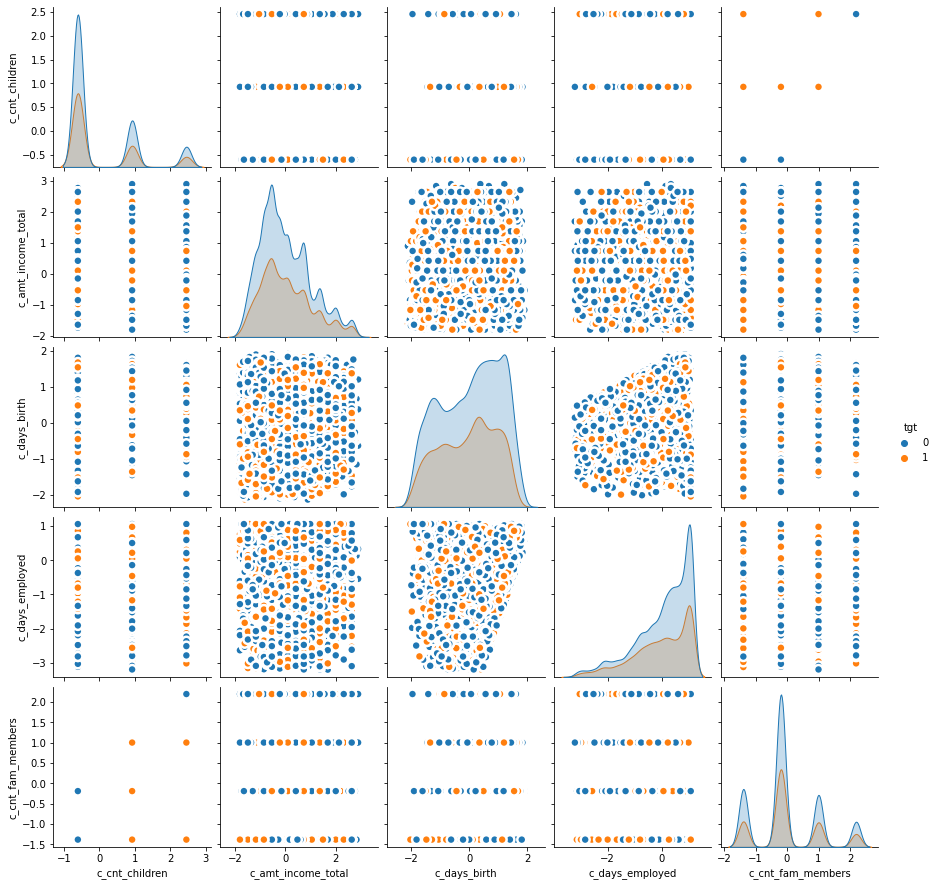

In [11]:
sns.pairplot(df[cont], kind="scatter", hue="tgt", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# 3. Select best variables.

In [12]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [13]:
Xt = df[predictors].copy()
yt = df[target].copy()


In [14]:
kb = SelectKBest(k=20)
z = kb.fit_transform(Xt, yt)

In [15]:
filtro = kb.get_support()
var = np.array(Xt.columns)

In [16]:
final_predictors = list(var[filtro])
final_predictors

['c_amt_income_total',
 'c_days_birth',
 'c_days_employed',
 'v_flag_own_car_Y_new',
 'v_flag_own_realty_Y_new',
 'v_name_income_type_State_servant_new',
 'v_name_education_type_Higher_education_new',
 'v_name_education_type_Lower_secondary_new',
 'v_name_education_type_Secondary_/_secondary_special_new',
 'v_name_family_status_Married_new',
 'v_name_family_status_Single_/_not_married_new',
 'v_name_housing_type_House_/_apartment_new',
 'v_name_housing_type_With_parents_new',
 'v_flag_email_1_new',
 'v_occupation_type_Drivers_new',
 'v_occupation_type_High_skill_tech_staff_new',
 'v_occupation_type_Managers_new',
 'v_occupation_type_Realty_agents_new',
 'v_occupation_type_Sales_staff_new',
 'v_occupation_type_Waiters/barmen_staff_new']

In [17]:
#Para evitar temas de alta dimensionalidad, sólo se trabajaran con las 10 mejores variables

#Revisamos la proporción de los datos

df[target].value_counts(), df[target].value_counts(1)

(0    16883
 1     9221
 Name: tgt, dtype: int64,
 0    0.646759
 1    0.353241
 Name: tgt, dtype: float64)

A partir de este punto, se trabajará con dos posibles caminos, tomando la proporción actual de eventos y no eventos y tomando un submuestreo para que estén 50/50 para evaluar como se comportan mejor los modelos

In [18]:
# from imblearn.under_sampling import CondensedNearestNeighbour
# Xt, yt serán los dataframes de proporciones originales
Xt = Xt[final_predictors]
Xv = test[final_predictors].copy()
yv = test[target].copy()


# Xt_1, yt_1 serán los dataframes con el submuestreo
Xt_1 = df.groupby('tgt', group_keys=False).apply(lambda x:x.sample(9221))

In [19]:
yt_1 = Xt_1[target].copy()
Xt_1 = Xt_1[final_predictors].copy()

In [20]:
Xt_1.shape

(18442, 20)

# 4. Fit the models and make an intepretation of the outcomes.
Dada la naturaleza de los datos, se tomó la decisión de implementar un arreglo de clasifiacodor votante, una red neuronal, random forest y sólo por comparar los resultados XGBoost. Este último se considerará sólo desde el punto de vista orientado a los resultados "computacionales" más que con un enfoque en la interpretabilidad para el negocio

In [21]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# from sklearn.model

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

## Red neuronal 

In [45]:
ailine = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 300, 200, 100), max_iter=500, verbose=2,
                      activation='tanh', solver='adam', learning_rate='adaptive')
# Ailine es una amiga muy querida que estudia un especialidad 
# médica en neurología xD por eso la red neuronal se llama así :) 

In [46]:
ailine.fit(Xt, yt)

Iteration 1, loss = 0.65516286
Iteration 2, loss = 0.64769611
Iteration 3, loss = 0.64712242
Iteration 4, loss = 0.64588371
Iteration 5, loss = 0.64465550
Iteration 6, loss = 0.64551928
Iteration 7, loss = 0.64363659
Iteration 8, loss = 0.64459525
Iteration 9, loss = 0.64318535
Iteration 10, loss = 0.64354380
Iteration 11, loss = 0.64200626
Iteration 12, loss = 0.64199368
Iteration 13, loss = 0.64048000
Iteration 14, loss = 0.63981669
Iteration 15, loss = 0.63791148
Iteration 16, loss = 0.63637039
Iteration 17, loss = 0.63336061
Iteration 18, loss = 0.63138272
Iteration 19, loss = 0.62827386
Iteration 20, loss = 0.62455379
Iteration 21, loss = 0.62236408
Iteration 22, loss = 0.61953140
Iteration 23, loss = 0.61449676
Iteration 24, loss = 0.61188050
Iteration 25, loss = 0.60670336
Iteration 26, loss = 0.60328610
Iteration 27, loss = 0.59924384
Iteration 28, loss = 0.59558585
Iteration 29, loss = 0.58949837
Iteration 30, loss = 0.58490676
Iteration 31, loss = 0.58061964
Iteration 32, los

MLPClassifier(activation='tanh',
              hidden_layer_sizes=(100, 200, 300, 300, 200, 100),
              learning_rate='adaptive', max_iter=500, verbose=2)

In [47]:
print(classification_report(yt, ailine.predict(Xt)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     16883
           1       0.76      0.60      0.67      9221

    accuracy                           0.79     26104
   macro avg       0.78      0.75      0.76     26104
weighted avg       0.79      0.79      0.79     26104



In [48]:
print(classification_report(yv, ailine.predict(Xv)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.77      4184
           1       0.57      0.45      0.50      2343

    accuracy                           0.68      6527
   macro avg       0.65      0.63      0.63      6527
weighted avg       0.67      0.68      0.67      6527



In [26]:
ailine_balanceada = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 500), max_iter=500, verbose=2,
                      activation='tanh', solver='adam', learning_rate='adaptive')
ailine_balanceada.fit(Xt_1, yt_1)

Iteration 1, loss = 0.69707475
Iteration 2, loss = 0.69091995
Iteration 3, loss = 0.68985260
Iteration 4, loss = 0.68940507
Iteration 5, loss = 0.68879344
Iteration 6, loss = 0.68832479
Iteration 7, loss = 0.68784799
Iteration 8, loss = 0.68771163
Iteration 9, loss = 0.68771144
Iteration 10, loss = 0.68710951
Iteration 11, loss = 0.68665553
Iteration 12, loss = 0.68656473
Iteration 13, loss = 0.68626922
Iteration 14, loss = 0.68566717
Iteration 15, loss = 0.68558456
Iteration 16, loss = 0.68595557
Iteration 17, loss = 0.68530016
Iteration 18, loss = 0.68519894
Iteration 19, loss = 0.68506616
Iteration 20, loss = 0.68534024
Iteration 21, loss = 0.68498233
Iteration 22, loss = 0.68498613
Iteration 23, loss = 0.68503734
Iteration 24, loss = 0.68462729
Iteration 25, loss = 0.68432936
Iteration 26, loss = 0.68469248
Iteration 27, loss = 0.68468650
Iteration 28, loss = 0.68400423
Iteration 29, loss = 0.68433197
Iteration 30, loss = 0.68407509
Iteration 31, loss = 0.68358651
Iteration 32, los

Iteration 253, loss = 0.47180765
Iteration 254, loss = 0.47079434
Iteration 255, loss = 0.47053359
Iteration 256, loss = 0.46960921
Iteration 257, loss = 0.46975605
Iteration 258, loss = 0.46649468
Iteration 259, loss = 0.46807871
Iteration 260, loss = 0.46787146
Iteration 261, loss = 0.46618179
Iteration 262, loss = 0.46682853
Iteration 263, loss = 0.46604603
Iteration 264, loss = 0.46762605
Iteration 265, loss = 0.46494647
Iteration 266, loss = 0.46314318
Iteration 267, loss = 0.46397660
Iteration 268, loss = 0.46377795
Iteration 269, loss = 0.46428860
Iteration 270, loss = 0.46230987
Iteration 271, loss = 0.46458903
Iteration 272, loss = 0.46138029
Iteration 273, loss = 0.46381975
Iteration 274, loss = 0.46093773
Iteration 275, loss = 0.46134849
Iteration 276, loss = 0.45846211
Iteration 277, loss = 0.45881402
Iteration 278, loss = 0.46025662
Iteration 279, loss = 0.45859217
Iteration 280, loss = 0.45911172
Iteration 281, loss = 0.45868586
Iteration 282, loss = 0.46000322
Iteration 

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 200, 300, 500),
              learning_rate='adaptive', max_iter=500, verbose=2)

In [27]:
print(classification_report(yt_1, ailine_balanceada.predict(Xt_1)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      9221
           1       0.79      0.78      0.79      9221

    accuracy                           0.79     18442
   macro avg       0.79      0.79      0.79     18442
weighted avg       0.79      0.79      0.79     18442



In [28]:
print(classification_report(yv, ailine_balanceada.predict(Xv)))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      4184
           1       0.51      0.65      0.57      2343

    accuracy                           0.65      6527
   macro avg       0.64      0.65      0.64      6527
weighted avg       0.68      0.65      0.66      6527



## Ensamble de clasificador votante

In [29]:
label = ['nb', 'lr', 'knn', 'tree', 'lda', 'rc']


models = [GaussianNB(), 
          LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean',n_jobs=8),
          DecisionTreeClassifier(max_depth=10),
          LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
          RidgeClassifier(alpha=0.5)]


models = dict(zip(label, models))
resultados = {}

for l in label:
    
    print(f'Comenzando con el modelo: {l}...\n')
    aux_dict = {}
    clf = models.get(l)
    clf.fit(Xt, yt)
    
    print('Entrenamiento: \n')
    predictions = clf.predict(Xt)
    print(classification_report(yt, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yt, predictions))
    
    train_score = recall_score(yt, predictions)
    
    print('Validación: \n')
    predictions = clf.predict(Xv)
    print(classification_report(yv, predictions))
    print('Matriz: \n')
    print(confusion_matrix(yv, predictions))    
    
    test_score = recall_score(yv, predictions)
    
    aux_dict['model'] = clf
    aux_dict['test_score'] = test_score
    aux_dict['train_score'] = train_score
    
    print(f'Train score: {train_score}.\n')
    print(f'Test score: {test_score}.\n')    
    
    resultados[l] = aux_dict
    print(f'Terminando con el modelo: {l}.\n')

Comenzando con el modelo: nb...

Entrenamiento: 

              precision    recall  f1-score   support

           0       0.68      0.50      0.58     16883
           1       0.38      0.56      0.45      9221

    accuracy                           0.52     26104
   macro avg       0.53      0.53      0.51     26104
weighted avg       0.57      0.52      0.53     26104

Matriz: 

[[8481 8402]
 [4080 5141]]
Validación: 

              precision    recall  f1-score   support

           0       0.67      0.50      0.57      4184
           1       0.38      0.56      0.45      2343

    accuracy                           0.52      6527
   macro avg       0.53      0.53      0.51      6527
weighted avg       0.57      0.52      0.53      6527

Matriz: 

[[2091 2093]
 [1042 1301]]
Train score: 0.5575317210714673.

Test score: 0.5552710200597525.

Terminando con el modelo: nb.

Comenzando con el modelo: lr...

Entrenamiento: 

              precision    recall  f1-score   support

     

In [30]:
Xt_n = Xt.copy()
Xt_n['estimated'] = ((resultados.get('nb').get('model').predict(Xt)*1) + 
               (resultados.get('lr').get('model').predict(Xt)*1) + 
               resultados.get('knn').get('model').predict(Xt)*5 + 
               resultados.get('tree').get('model').predict(Xt)*1 + 
               resultados.get('lda').get('model').predict(Xt)*1 + 
              resultados.get('rc').get('model').predict(Xt)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xt_n['estimated_2'] = np.where(Xt_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xt_n.head()

,c_amt_income_total,c_days_birth,c_days_employed,v_flag_own_car_Y_new,v_flag_own_realty_Y_new,v_name_income_type_State_servant_new,v_name_education_type_Higher_education_new,v_name_education_type_Lower_secondary_new,v_name_education_type_Secondary_/_secondary_special_new,v_name_family_status_Married_new,...,v_name_housing_type_With_parents_new,v_flag_email_1_new,v_occupation_type_Drivers_new,v_occupation_type_High_skill_tech_staff_new,v_occupation_type_Managers_new,v_occupation_type_Realty_agents_new,v_occupation_type_Sales_staff_new,v_occupation_type_Waiters/barmen_staff_new,estimated,estimated_2
0,1.367373,-0.916262,0.674171,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,6,1
1,-0.790742,-1.336040,1.056909,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.917690,-1.986170,1.056909,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.034419,-0.194571,0.979541,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,0
4,0.732633,0.414399,-1.066609,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
ypred = Xt_n['estimated_2'].copy()

In [32]:
print(classification_report(yt, ypred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83     16883
           1       0.78      0.41      0.54      9221

    accuracy                           0.75     26104
   macro avg       0.76      0.67      0.68     26104
weighted avg       0.76      0.75      0.73     26104



In [33]:
Xv_n = Xv.copy()
Xv_n['estimated'] = ((resultados.get('nb').get('model').predict(Xv)*1) + 
               (resultados.get('lr').get('model').predict(Xv)*1) + 
               resultados.get('knn').get('model').predict(Xv)*5 + 
               resultados.get('tree').get('model').predict(Xv)*1 + 
               resultados.get('lda').get('model').predict(Xv)*1 + 
              resultados.get('rc').get('model').predict(Xv)*1)
                

n_votos = 6 # Número de votos de los modelos, para que sea considerado un evento
Xv_n['estimated_2'] = np.where(Xv_n['estimated']>=n_votos, 1, 0)#Regla de cuántos votos resultarían en que la clasificación sea positiva

Xv_n.head()

,c_amt_income_total,c_days_birth,c_days_employed,v_flag_own_car_Y_new,v_flag_own_realty_Y_new,v_name_income_type_State_servant_new,v_name_education_type_Higher_education_new,v_name_education_type_Lower_secondary_new,v_name_education_type_Secondary_/_secondary_special_new,v_name_family_status_Married_new,...,v_name_housing_type_With_parents_new,v_flag_email_1_new,v_occupation_type_Drivers_new,v_occupation_type_High_skill_tech_staff_new,v_occupation_type_Managers_new,v_occupation_type_Realty_agents_new,v_occupation_type_Sales_staff_new,v_occupation_type_Waiters/barmen_staff_new,estimated,estimated_2
0,-0.219477,-0.349386,-0.365022,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,-0.219477,1.419996,-0.179221,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.536846,-0.158089,0.265645,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0.415263,0.497420,0.692341,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,5,0
4,-0.536846,-1.550957,1.056909,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
ypred = Xv_n['estimated_2'].copy()

In [35]:
print(classification_report(yv, ypred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      4184
           1       0.59      0.30      0.40      2343

    accuracy                           0.68      6527
   macro avg       0.64      0.59      0.59      6527
weighted avg       0.66      0.68      0.64      6527



In [36]:
xgb = XGBClassifier(n_estimators=100, n_jobs=-1, booster='dart')
xgb.fit(Xt, yt)

[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1


/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:59:35] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:35] INFO: /h

[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[23:59:37] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:37] INFO: /h

[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[23:59:38] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:38] INFO: /

[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[23:59:40] INFO: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/gbm/gbtree.cc:904: drop 0 trees, weight = 1
[23:59:40] INFO: /h

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [37]:
print(classification_report(yt, xgb.predict(Xt)))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82     16883
           1       0.76      0.38      0.50      9221

    accuracy                           0.74     26104
   macro avg       0.75      0.66      0.66     26104
weighted avg       0.74      0.74      0.71     26104



In [38]:
print(classification_report(yv, xgb.predict(Xv)))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77      4184
           1       0.58      0.25      0.35      2343

    accuracy                           0.67      6527
   macro avg       0.63      0.57      0.56      6527
weighted avg       0.65      0.67      0.62      6527

